Source: This example comes from the torch adaptation of Charles Ollion [/github/charlesollion].

In [1]:

import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

Data Acquisition

In [37]:
!python3 -m wget https://raw.githubusercontent.com/LuisM78/Appliances-energy-prediction-data/master/energydata_complete.csv

100% [....................................................] 11979363 / 11979363
Saved under energydata_complete (1).csv


In [39]:
df = pd.read_csv("energydata_complete.csv", index_col='date', parse_dates=['date'])
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [220]:
df = pd.read_csv("preprocessed_dataset.csv")
df = df.set_index('date')
df.index = pd.to_datetime(df.index)

Data loading and preprocessing. Data is similar to project work, and has

In [221]:
# def floatation(df, attributes):
#     for var in attributes:
#         df[var] = df[var].astype(str)            # converting to string
#         df[var] = df[var].str.replace(',', '.')  # replacing the commas with dot decimal separatpr
#         df[var] = df[var].astype(np.float32)     # converting the values into dot
#     return df
# df = pd.read_csv("energydata_complete.csv", index_col='date', parse_dates=['date'])
# print(df.head())

In [304]:
attributes = list(df.columns)
data = df.values

Function for splitting the dataset into sequences of observations of length history size.

In [305]:
def sequencing(dataset, start_index=0, end_index=None, history_size=31, step=1):
    data = []
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset)
    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])
    return np.array(data)


Function for splitting the dataset into training and validation, and data normalization.

In [306]:
def partition(data, pTrain=0.8, pVal = 0.5, save_path=None):
    # I don't like this normalization before training thingie
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    data = (data - data_mean)/data_std
    stats = (data_mean, data_std)

    sequencedData = sequencing(data, start_index=0, end_index=None, history_size=31, step=1)
    # plt.plot(sequencedData[:, 0, 0])
    # plt.show()

    dataTrain = sequencedData[:int(sequencedData.shape[0]*0.8), :, :]
    dataVal = sequencedData[int(sequencedData.shape[0]*0.8):int(sequencedData.shape[0]*0.9), :, :]
    dataTest = sequencedData[int(sequencedData.shape[0]*0.9):, :, :]

    return dataTrain, dataVal, dataTest

Create input-putput pairs.

In [307]:
def split(chunk):
    inputs = torch.tensor(chunk[:, :-1, :], device=device) # What about that device?
    targets = torch.tensor(chunk[:, 1:, :], device=device)
    return inputs, targets

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Loaders

In [308]:
def createLoaders(dataTrain, dataVal, dataTest, batchSize=32, responseVariables=[0, 1, 2, 3]):
    XTrain, YTrain = split(dataTrain)
    XVal, YVal = split(dataVal)
    XTest, YTest = split(dataTest)

    YTrain = torch.unsqueeze(YTrain[:,:,responseVariables], 2) if len(responseVariables) == 1 else YTrain[:,:,responseVariables]
    YVal = torch.unsqueeze(YVal[:,:,responseVariables], 2) if len(responseVariables) == 1 else YVal[:,:,responseVariables]
    YTest = torch.unsqueeze(YTest[:,:,responseVariables], 2) if len(responseVariables) == 1 else YTest[:,:,responseVariables]
    
    # XTrain = torch.cat([XTrain[:, :, :responseVariables], XTrain[:, :, responseVariables+1:]], dim=2)
    # XVal = torch.cat([XVal[:, :, :responseVariables], XVal[:, :, responseVariables+1:]], dim=2)
    # XTest = torch.cat([XTest[:, :, :responseVariables], XTest[:, :, responseVariables+1:]], dim=2)
    
    trainDS = torch.utils.data.TensorDataset(XTrain, YTrain)
    valDS = torch.utils.data.TensorDataset(XVal, YVal)
    testDS = torch.utils.data.TensorDataset(XTest, YTest)

    trainLoader = torch.utils.data.DataLoader(trainDS, batch_size=batchSize)
    valLoader = torch.utils.data.DataLoader(valDS, batch_size=batchSize)
    testLoader = torch.utils.data.DataLoader(testDS, batch_size=batchSize)

    return trainLoader, valLoader, testLoader

trainData, valData, testData = partition(data)
trainDataset, valDataset, testDataset = createLoaders(trainData, valData, testData)

(inputs, targets) = next(iter(trainDataset))
print(inputs.shape)
print(targets.shape)
                         

torch.Size([32, 30, 4])
torch.Size([32, 30, 4])


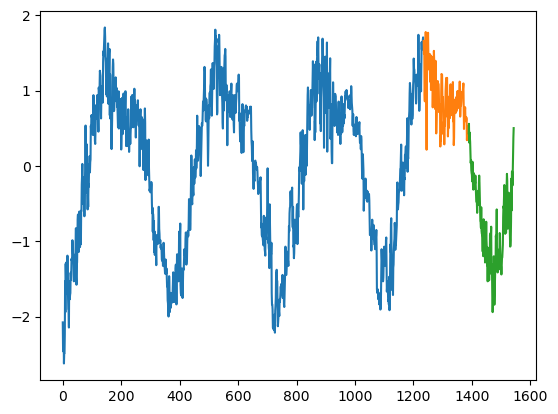

In [309]:
# %matplotlib qt
%matplotlib inline
plt.plot(np.array(list(range(trainData[:, 0, 0].shape[0]))), trainData[:, 0, 0])
plt.plot(np.array(list(range(trainData[:, 0, 0].shape[0], 
                             trainData[:, 0, 0].shape[0] + valData[:, 0, 0].shape[0]))), valData[:, 0, 0])
plt.plot(np.array(list(range(trainData[:, 0, 0].shape[0] + valData[:, 0, 0].shape[0], 
                             trainData[:, 0, 0].shape[0] + valData[:, 0, 0].shape[0] + testData[:, 0, 0].shape[0]))), testData[:, 0, 0])
plt.show()

Transformer NN implementation

In [310]:
import torch.nn as nn
import math

class MultiHeadAttention(nn.Module):
    def __init__(self, D, H):
        super(MultiHeadAttention, self).__init__()
        self.H = H # number of heads
        self.D = D # dimension
        
        self.wq = nn.Linear(D, D*H)
        self.wk = nn.Linear(D, D*H)
        self.wv = nn.Linear(D, D*H)

        self.dense = nn.Linear(D*H, D)

    def concat_heads(self, x):
        '''(B, H, S, D) => (B, S, D*H)'''
        B, H, S, D = x.shape
        x = x.permute((0, 2, 1, 3)).contiguous()  # (B, S, H, D)
        x = x.reshape((B, S, H*D))   # (B, S, D*H)
        return x

    def split_heads(self, x):
        '''(B, S, D*H) => (B, H, S, D)'''
        B, S, D_H = x.shape
        x = x.reshape(B, S, self.H, self.D)    # (B, S, H, D)
        x = x.permute((0, 2, 1, 3))  # (B, H, S, D)
        return x

    def forward(self, x, mask):

        q = self.wq(x)  # (B, S, D*H)
        k = self.wk(x)  # (B, S, D*H)
        v = self.wv(x)  # (B, S, D*H)

        q = self.split_heads(q)  # (B, H, S, D)
        k = self.split_heads(k)  # (B, H, S, D)
        v = self.split_heads(v)  # (B, H, S, D)

        attention_scores = torch.matmul(q, k.transpose(-1, -2)) #(B,H,S,S)
        attention_scores = attention_scores / math.sqrt(self.D)

        # add the mask to the scaled tensor.
        if mask is not None:
            attention_scores += (mask * -1e9)
        
        attention_weights = nn.Softmax(dim=-1)(attention_scores)
        scaled_attention = torch.matmul(attention_weights, v)  # (B, H, S, D)
        concat_attention = self.concat_heads(scaled_attention) # (B, S, D*H)
        output = self.dense(concat_attention)  # (B, S, D)

        return output, attention_weights

In [311]:
B, S, H, D = 9, 11, 5, 8
mha = MultiHeadAttention(D, H)
out, att = mha.forward(torch.zeros(B, S, D), mask=None)
out.shape, att.shape

(torch.Size([9, 11, 8]), torch.Size([9, 5, 11, 11]))

In [312]:
# Positional encodings
def get_angles(pos, i, D):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(D))
    return pos * angle_rates


def positional_encoding(D, position=30, dim=3, device=device):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(D)[np.newaxis, :],
                            D)
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    if dim == 3:
        pos_encoding = angle_rads[np.newaxis, ...]
    elif dim == 4:
        pos_encoding = angle_rads[np.newaxis,np.newaxis,  ...]
    return torch.tensor(pos_encoding, device=device)

# function that implement the look_ahead mask for masking future time steps. 
def create_look_ahead_mask(size, device=device):
    mask = torch.ones((size, size), device=device)
    mask = torch.triu(mask, diagonal=1).double()
    return mask  # (size, size)

create_look_ahead_mask(6)

class TransformerLayer(nn.Module):
    def __init__(self, D, H, hidden_mlp_dim, dropout_rate):
        super(TransformerLayer, self).__init__()
        self.dropout_rate = dropout_rate
        self.mlp_hidden = nn.Linear(D, hidden_mlp_dim)
        self.mlp_out = nn.Linear(hidden_mlp_dim, D)
        self.layernorm1 = nn.LayerNorm(D, eps=1e-9)
        self.layernorm2 = nn.LayerNorm(D, eps=1e-9)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)

        self.mha = MultiHeadAttention(D, H)


    def forward(self, x, look_ahead_mask):
        
        attn, attn_weights = self.mha(x, look_ahead_mask)  # (B, S, D)
        attn = self.dropout1(attn) # (B,S,D)
        attn = self.layernorm1(attn + x) # (B,S,D)

        mlp_act = torch.relu(self.mlp_hidden(attn))
        mlp_act = self.mlp_out(mlp_act)
        mlp_act = self.dropout2(mlp_act)
        
        output = self.layernorm2(mlp_act + attn)  # (B, S, D)

        return output, attn_weights

In [313]:
dl = TransformerLayer(16, 3, 32, 0.1)
out, attn = dl(x=torch.zeros(5, 7, 16), look_ahead_mask=None)
out.shape, attn.shape

(torch.Size([5, 7, 16]), torch.Size([5, 3, 7, 7]))

In [314]:
class Transformer(nn.Module):
    '''Transformer Decoder Implementating several Decoder Layers.
    '''
    def __init__(self, num_layers, D, H, hidden_mlp_dim, inp_features, out_features, dropout_rate):
        super(Transformer, self).__init__()
        self.sqrt_D = torch.tensor(math.sqrt(D))
        self.num_layers = num_layers
        self.input_projection = nn.Linear(inp_features, D) # multivariate input
        self.output_projection = nn.Linear(D, out_features) # multivariate output
        self.pos_encoding = positional_encoding(D)
        self.dec_layers = nn.ModuleList([TransformerLayer(D, H, hidden_mlp_dim, 
                                        dropout_rate=dropout_rate
                                       ) for _ in range(num_layers)])
        self.dropout = nn.Dropout(dropout_rate)
        self.double()

    def forward(self, x, mask):
        B, S, D = x.shape
        attention_weights = {}
        x = self.input_projection(x)
        x *= self.sqrt_D
        
        x += self.pos_encoding[:, :S, :]

        x = self.dropout(x)

        for i in range(self.num_layers):
            x, block = self.dec_layers[i](x=x,
                                          look_ahead_mask=mask)
            attention_weights['decoder_layer{}'.format(i + 1)] = block
        
        x = self.output_projection(x)
        
        return x, attention_weights # (B,S,S)

In [315]:
# Test Forward pass on the Transformer: 
transformer = Transformer(num_layers=1, D=32, H=1, hidden_mlp_dim=32,
                                       inp_features=4, out_features=4, dropout_rate=0.1)
transformer.to(device)
(inputs, targets) = next(iter(trainDataset))
print(inputs.shape)
print(targets.shape)
                         
S = inputs.shape[1]
mask = create_look_ahead_mask(S)
out, attn = transformer (x=inputs, mask=mask)
out.shape, attn["decoder_layer1"].shape

torch.Size([32, 30, 4])
torch.Size([32, 30, 4])


(torch.Size([32, 30, 4]), torch.Size([32, 1, 30, 30]))

Training the Transformer

In [316]:
param_sizes = [p.numel() for p in transformer.parameters()]
print(f"number of weight/biases matrices: {len(param_sizes)} "
      f"for a total of {np.sum(param_sizes)} parameters ")

number of weight/biases matrices: 20 for a total of 6756 parameters 


In [344]:
transformer = Transformer(num_layers=4, D=32, H=8, hidden_mlp_dim=32,
                          inp_features=4, out_features=4, dropout_rate=0.1).to(device)
optimizer = torch.optim.RMSprop(transformer.parameters(), 
                                lr=0.00005)

In [345]:
!pip3 install tqdm
from tqdm import tqdm

n_epochs = 50
niter = len(trainDataset)
losses, val_losses = [], []

for e in tqdm(range(n_epochs)):
    
    # one epoch on train set
    transformer.train()
    sum_train_loss = 0.0
    for x,y in trainDataset:
        S = x.shape[1]
        mask = create_look_ahead_mask(S)
        out, _ = transformer(x, mask)
        loss = torch.nn.MSELoss()(out, y)
        sum_train_loss += loss.item()
        loss.backward()
        optimizer.step()
    losses.append(sum_train_loss / niter)
    
    # Evaluate on val set
    transformer.eval()
    sum_val_loss = 0.0
    for i, (x, y) in enumerate(valDataset):
        S = x.shape[1]
        mask = create_look_ahead_mask(S)
        out, _ = transformer(x, mask)
        loss = torch.nn.MSELoss()(out, y)
        sum_val_loss += loss.item()
    val_losses.append(sum_val_loss / (i + 1))

100%|██████████| 50/50 [00:32<00:00,  1.56it/s]


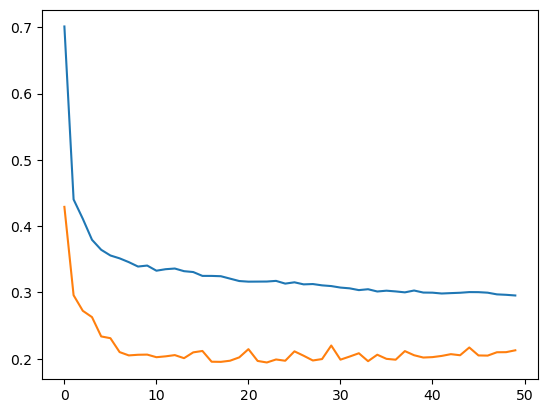

In [346]:
plt.plot(losses)
plt.plot(val_losses)

tensor([1.2857, 1.3243, 1.2574, 1.0685, 1.2729, 1.2363, 1.0873, 0.7717, 0.4566,
        0.6079, 0.3553, 0.7381, 1.2316, 1.3359, 0.9280, 1.2389, 1.2867, 1.4390,
        0.7804, 0.7887, 0.9303, 1.0103, 0.4842, 0.4975, 0.6522, 0.5261, 0.6171,
        0.3879, 0.6172, 0.8389], device='cuda:0', dtype=torch.float64,
       grad_fn=<SelectBackward0>)


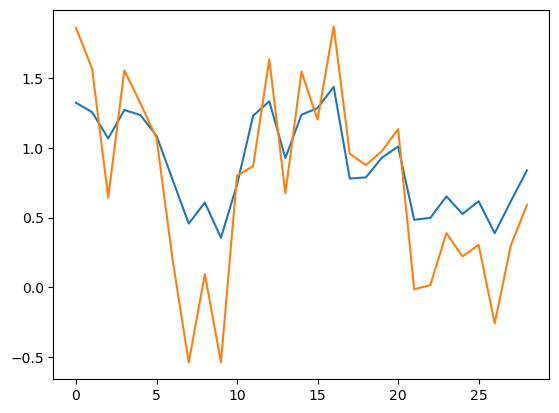

In [350]:
transformer.eval()

S = inputs.shape[1]
mask = create_look_ahead_mask(S)
out, attn = transformer(x=inputs, mask=mask)
print(out[0][:, 1])

plt.plot(out[0][1:, 1].detach().cpu().numpy())
plt.plot(targets[0][:-1, 1].detach().cpu().numpy())
plt.show()